In [4]:
import os
import yake

In [35]:
year = 197

In [36]:
data_path = '../tac/data/'
txt_path = '../data/txt4-4/'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]


In [37]:
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding="utf-8") as f:
        content_list.append(f.read())

In [38]:
temp_path = '../data/tmp/tmp4/'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding="utf-8") as f:
    f.write(' '.join(content_list))

In [5]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [1]:
data_path2 = '../data/tmp/tmp4/'
mon_fichier = os.listdir(data_path2)
notre_texte = mon_fichier[0]
notre_texte = open(os.path.join(data_path2, notre_texte ), 'r', encoding="utf-8").read()


FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: '../data/tmp/tmp4/'

In [ ]:
# Extraire les mots clés de ce texte
keywords4 = kw_extractor.extract_keywords(notre_texte)
keywords4

[('Ecrire Agence Rossel', 3.7831338201099055e-11),
 ('Agence HAVAS Bruxelles', 1.5163514096671817e-09),
 ('Bruxelles demande EMPLOYE', 1.5499452049678802e-09),
 ('JEUNE EMPLOYE bilingue', 1.7526377177522248e-09),
 ('IMPORTANTE SOCIETE BRUXELLES', 1.7831801303100866e-09),
 ('vitae Agence Rossel', 2.068461279525321e-09),
 ('FIRME IMPORTANTE BRUXELLES', 2.309757105325811e-09),
 ('JEUNE EMPLOYEE DACTYLO', 2.7070975654986845e-09),
 ('Bruxelles jeune EMPLOYE', 2.7941421106172307e-09),
 ('Bruxelles Ecrire Agence', 2.8193613182749816e-09),
 ('EMPLOYEE DACTYLO bilingue', 3.0347204557377794e-09),
 ('Agence Rossel', 3.1540475527772216e-09),
 ('Bruxelles demande Jeune', 3.176076606625733e-09),
 ('offre Agence Rossel', 3.1772019696734407e-09),
 ('dactylo bilingue Ecrire', 3.2619127701906177e-09),
 ('FIRME IMPORTANTE demande', 3.81698324355147e-09),
 ('importante SOCIETE INDUSTRIELLE', 3.960815093703024e-09),
 ('DEMANDE JEUNE EMPLOYE', 3.977972342046661e-09),
 ('Agence Rossel num', 4.304096616288813

In [ ]:
kept = []
for kw, score in keywords4:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['Agence Rossel']

In [ ]:
#imports
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "très", "tel", "Brux", 
       "Mod", "mois", "cours", "centre", "lundi", "mardi", "mercredi", "jeudi", "vendredi", 
       "samedi", "dimanche", "jour", "jard", "ref", "etc", "culs", "chez", "mal", "bel",
       "toute", "janvier", "février", "mars", "avril", "mai", "juin", "juillet", "aout", 
       "septembre", "octobre", "novembre", "decembre", "confs", "temps", "francs", "brux",
       "ans", "pet", "pers", "ans", "rue", "tel", "louer", "suite", "ecr", "vente", "leur", 
       "leurs", "jean", "gros", "refer", "orch", "ref", "mme", "quelques", "AOUT", "nord", 
       "midi", "fille", "mme", "app", "soir", "avant", "réf", "déja", "francs", "pres", "rez",
       "vis", "conf", "louis", "louise", "paul", "franc", "meub", "cap", "enf", "conf", 
       "déjà", "ref", "pierre", "ceux", "age", "adr", "semaine", "inst", "bon", "heure", 
       "aven", "sal", "vers", "trav", "mans", "tel", "angl", "steno", "com", "cour", "mod",
       "soc", "dact", "chef", "mise", "surv", "lux", "bil", "hav",]
sw = set(sw)

In [ ]:
year1 = 1963

In [ ]:
#création d'une fonction de 'cleaning'
def clean_text(year1, folder=None):
    if folder is None:
        input_path = f"{year1}.txt"
        output_path = f"{year1}_clean.txt"
    else:
        input_path = f"{folder}/{year1}.txt"
        output_path = f"{folder}/{year1}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [ ]:
path = "../data/tmp/tmp4/"
clean_text(year1, folder=path)

'Output has been written in ../data/tmp/tmp4//1963_clean.txt!'

In [ ]:
with open(os.path.join(path, f'{year1}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

In [ ]:
frequencies = Counter(after.split())
print(frequencies.most_common(30))

[('BRUXELLES', 26464), ('AGENCE', 17058), ('ECRIRE', 15611), ('BILINGUE', 12176), ('DACTYLO', 11554), ('VITAE', 10488), ('DEMANDE', 9925), ('IMPORTANTE', 9498), ('SERVICE', 9234), ('OFFRE', 8938), ('CURRICULUM', 7764), ('ENGAGE', 7049), ('BONNE', 6892), ('JOURS', 6861), ('FIRME', 6623), ('CHERCHE', 6570), ('TÉL', 6412), ('JEUNE', 6240), ('BUREAU', 6000), ('FRANÇAIS', 5790), ('FLAMAND', 5716), ('SITUATION', 5697), ('ANGLAIS', 5674), ('PRÉTENTIONS', 5047), ('NUMÉRO', 5010), ('AVENIR', 4928), ('EXPÉRIENCE', 4891), ('PLACE', 4823), ('TRAVAIL', 4819), ('EMPLOYE', 4795)]


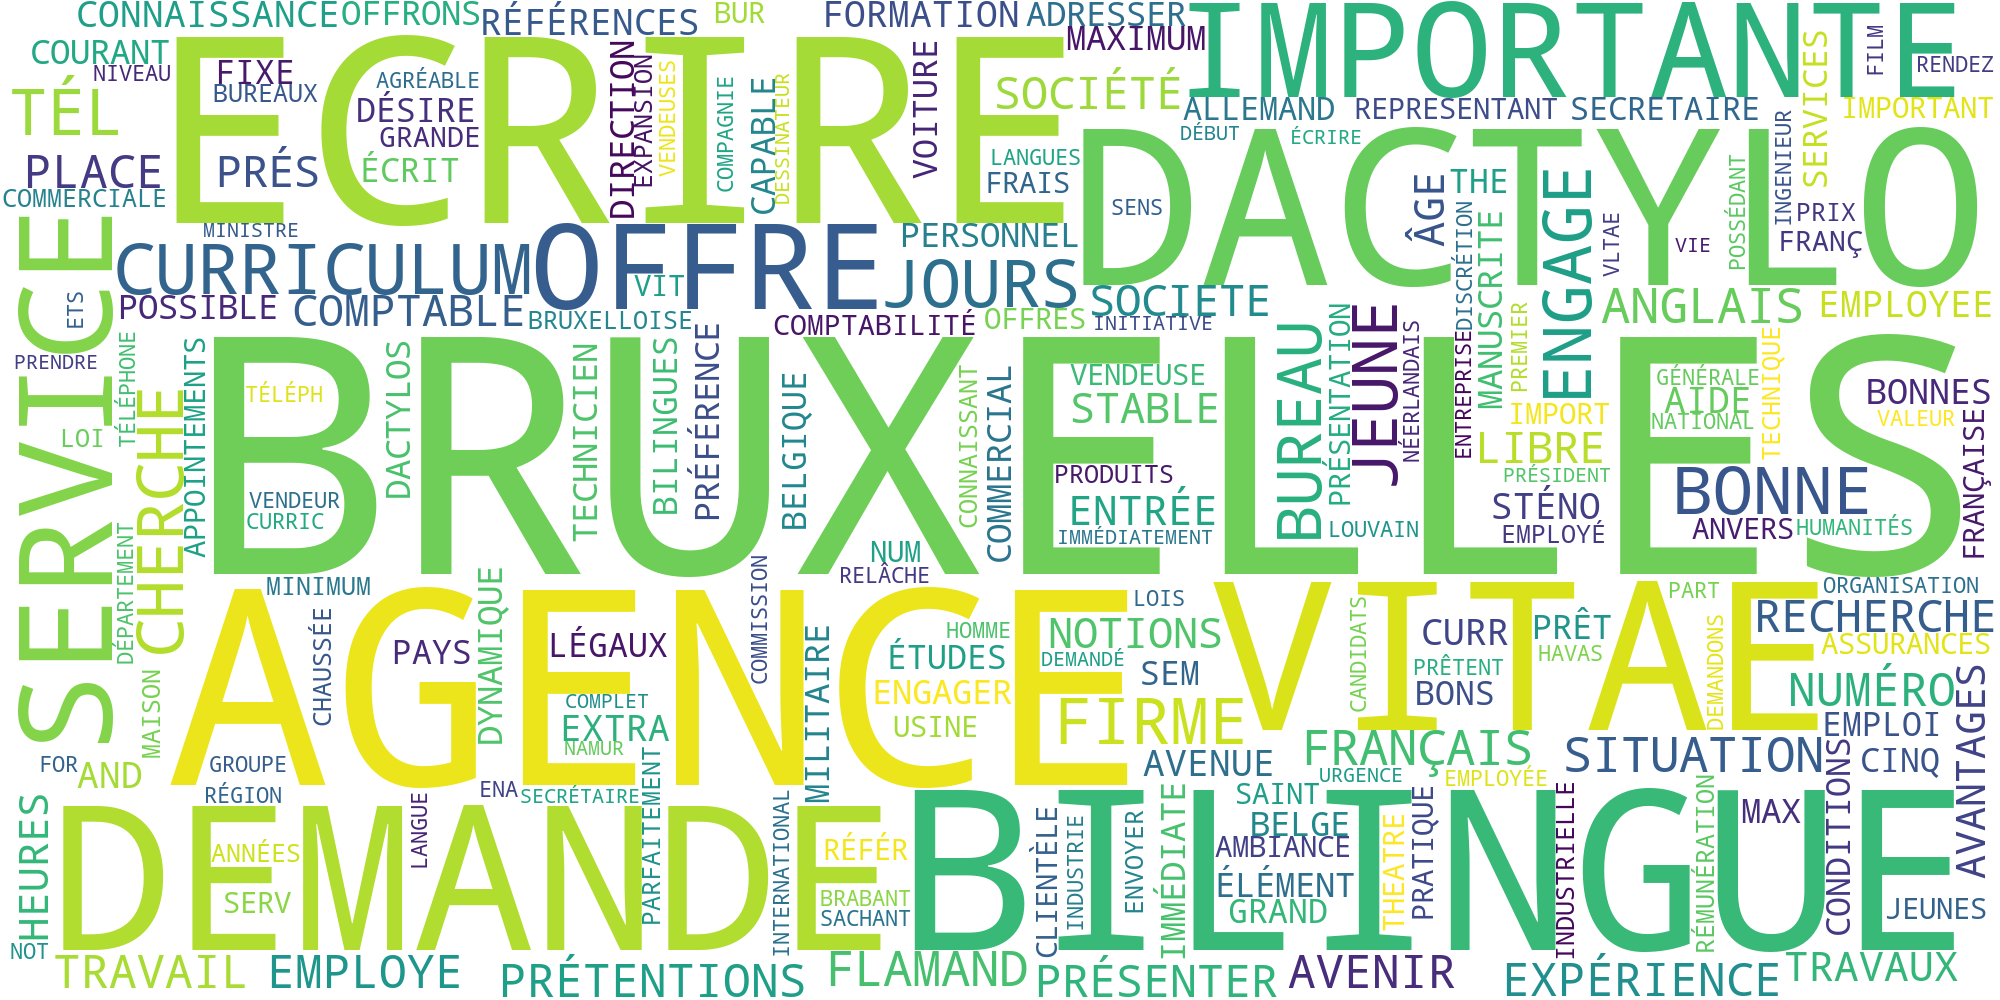

In [ ]:
notre_nuage4 = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
notre_nuage4.to_file(os.path.join(path, f"{year1}.png"))
Image(filename=os.path.join(path, f"{year1}.png"))

In [1]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

In [2]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [3]:
infile = f"../deuxième-partie/1963_clean.txt"
sentences = MySentences(infile)

In [4]:
bigram_corpus4 = Phrases(sentences)

In [5]:
bigram_phraser4 = Phraser(phrases_model=bigram_corpus4)

In [6]:
trigram_phrases4 = Phrases(bigram_phraser4[sentences])

In [7]:
trigram_phraser4 = Phraser(phrases_model=trigram_phrases4)

In [8]:
training_model4 = list(trigram_phraser4[bigram_phraser4[sentences]])

In [9]:
%%time
model4 = Word2Vec(
training_model4,
vector_size = 32,
window = 8,
min_count = 5,
workers = 16,
epochs = 5,
)

CPU times: total: 2.36 s
Wall time: 2.37 s


In [13]:
outfile = f"../newspapers.model"
model4.save(outfile)

In [14]:
model4.wv["flamand"]

array([-0.02969928,  0.02708314,  0.01404886,  0.02944854,  0.02118094,
        0.00805292,  0.03180734, -0.01337457, -0.02284489,  0.01390086,
        0.01195234, -0.01875381,  0.03098376, -0.01113405,  0.0300032 ,
        0.0029312 , -0.02064407, -0.00527946, -0.02289767, -0.00855222,
        0.00378545,  0.03101457,  0.03057825, -0.0213447 ,  0.01123532,
        0.0073878 , -0.00830309, -0.02904166,  0.0029338 , -0.02671328,
        0.01984618, -0.01871143], dtype=float32)

In [15]:
model4.wv["guerre"]

array([-0.01669269, -0.00321301, -0.00247437,  0.02982296, -0.01839998,
       -0.03119563,  0.01995327, -0.0282146 ,  0.01691939,  0.01029783,
       -0.01266805,  0.03094635, -0.01227775, -0.02984295,  0.00514966,
        0.0233161 , -0.01698834, -0.0257201 , -0.00689275, -0.02361818,
       -0.01942052, -0.01656681, -0.0063314 , -0.02834929,  0.01736694,
       -0.00093577, -0.02599414,  0.00769588,  0.0082787 , -0.02299952,
       -0.01245755,  0.01405658], dtype=float32)

In [28]:
model4.wv.similarity("flamand", "wallon")

0.10340242

In [21]:
model4.wv["bruxelles"]

array([ 0.00047282, -0.00306413,  0.01844822,  0.02897304, -0.02836396,
       -0.02595582,  0.02334609,  0.03042384, -0.02027755, -0.01077538,
        0.02484487, -0.00728272, -0.01250709,  0.02011191, -0.01596375,
       -0.00513464,  0.00687604,  0.00573814, -0.02689898, -0.0274364 ,
        0.02420748,  0.01949412,  0.02717748,  0.00043166,  0.02118388,
       -0.00968065, -0.00357128,  0.01846676, -0.02405601, -0.0157694 ,
       -0.02436965, -0.00425728], dtype=float32)

In [23]:
model4.wv.similarity("anvers", "bruxelles")

-0.061620727

In [24]:
print(model4.wv.most_similar(positive=["flamand"], negative=['wallon']))

[('defendus', 0.6866429448127747), ('aanvrag_met', 0.6483914852142334), ('llr', 0.6166839003562927), ('westbury', 0.6077366471290588), ('transports', 0.5959645509719849), ('theatre_ile', 0.5889480113983154), ('imposes', 0.5770416259765625), ('leadership', 0.5735092759132385), ('cosmonautes', 0.5710702538490295), ('overseas', 0.5709319710731506)]


In [25]:
model4.wv.most_similar("flamand", topn=15)

[('franc_orth', 0.6609811186790466),
 ('dactylo_etudes_moy', 0.6576476097106934),
 ('nuit_generaux', 0.6438021063804626),
 ('serviette', 0.6413965821266174),
 ('repetitions', 0.6164365410804749),
 ('ancien_combattant', 0.6080843806266785),
 ('knott', 0.6063539385795593),
 ('parfaite', 0.5925125479698181),
 ('capable_adapter', 0.5907800793647766),
 ('collegue', 0.5801005363464355)]

In [26]:
model4.wv.most_similar("bilingue", topn=10)

[('inter_interimat_champagne', 0.6129280924797058),
 ('schryver', 0.6108657717704773),
 ('plaee', 0.5909634828567505),
 ('definitifs', 0.589542806148529),
 ('also', 0.5840170383453369),
 ('prestigieux', 0.582905650138855),
 ('brouc_kere', 0.580382227897644),
 ('importante_firme_confections', 0.5759115815162659),
 ('connaissances_speciales', 0.5752221345901489),
 ('jeune_element_feminin', 0.5722726583480835)]

In [27]:
model4.wv.most_similar("conflit", topn=10)

[('avenir_offre_manuscrite', 0.6549270749092102),
 ('ligne_demarcation', 0.6512473225593567),
 ('joncs', 0.6438462734222412),
 ('avenue_volxem', 0.6259002685546875),
 ('maintes_fois', 0.5958106517791748),
 ('precoce', 0.5918453335762024),
 ('dactylos_secretaires', 0.5823466777801514),
 ('cnt', 0.5768434405326843),
 ('pretentions_agence_rosse', 0.5761613845825195),
 ('new_european_research_center', 0.5755562782287598)]